                                              filename       MAE
327  eform_compact_dim_s250_initial_downstream_Neit...  0.308952
328  eform_compact_dim_s250_initial_downstream_Neit...  0.307942
329  eform_compact_dim_s250_initial_downstream_Neit...  0.329165
330  eform_compact_dim_s250_initial_downstream_Neit...  0.328177
331  eform_compact_dim_s250_initial_downstream_Neit...  0.330667
332  eform_compact_dim_s250_initial_downstream_Neit...  0.312210
333  eform_compact_dim_s250_initial_downstream_Neit...  0.325065
334  eform_compact_dim_s250_initial_downstream_Neit...  0.325347
335  eform_compact_dim_s250_initial_downstream_Neit...  0.301044
336  eform_compact_dim_s250_initial_downstream_Neit...  0.304379
337  eform_compact_dim_s250_initial_downstream_Neit...  0.332154
338  eform_compact_dim_s250_initial_downstream_Neit...  0.281809
[275    0.427454
276    0.442873
277    0.440887
278    0.463643
279    0.449778
280    0.456582
281    0.453696
282    0.402963
283    0.421131
284    0.4

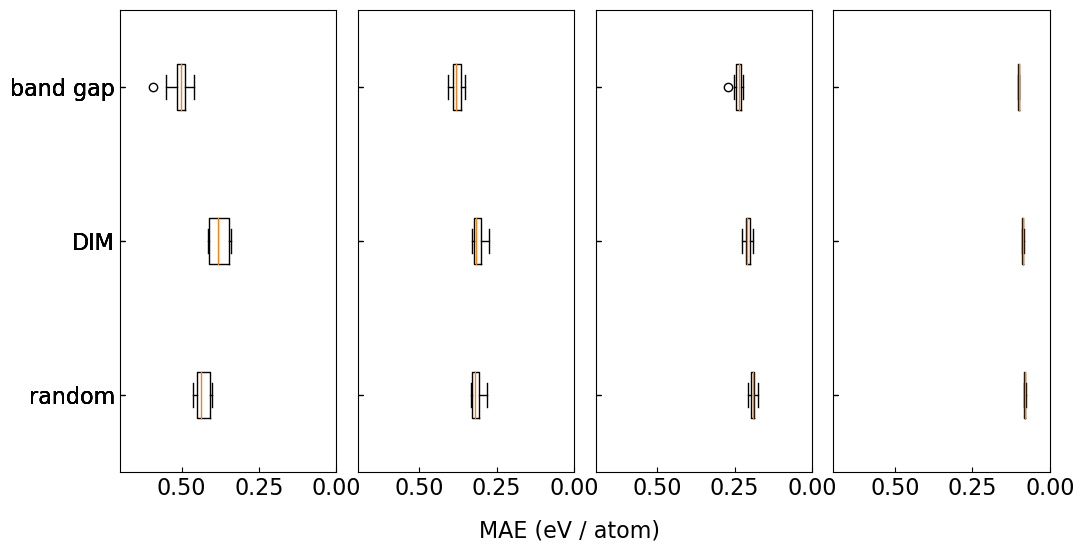

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

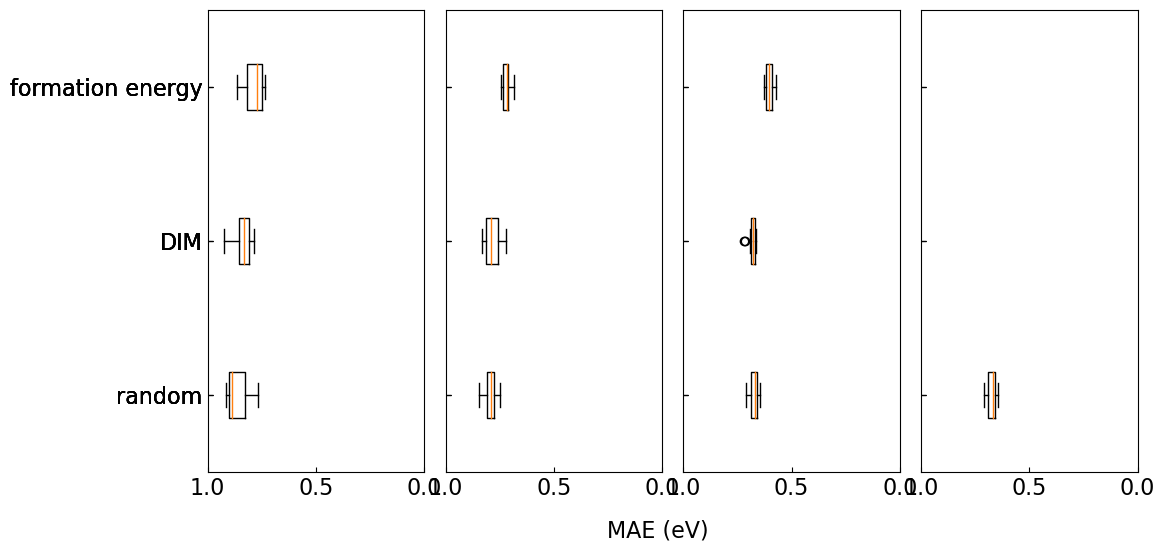

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt      
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

font = {'size'   : 16}

matplotlib.rc('font', **font)

DownMAE = pd.read_csv("Downstream_MAEs.csv",header=None,names=["filename","MAE"])
print(DownMAE[DownMAE["filename"].str.contains("eform_compact_dim_s250_initial_downstream_Neither")])

box_plot_1 = [["eform_compact_dim_s100_initial_downstream_Neither_", "eform_compact_dim_s100_DIM_downstream_Neither_DIM_eform_", "eform_compact_dim_s100_DIM_downstream_Neither_Supervised_egap_"],["random","DIM","band gap"],"eform_s100_transfer.png",[0.0,1.0]]
box_plot_2 = [["eform_compact_dim_s250_initial_downstream_Neither_","eform_compact_dim_s250_DIM_downstream_Neither_DIM_eform_","eform_compact_dim_s250_DIM_downstream_Neither_Supervised_egap_"],["random","DIM","band gap"],"eform_s250_transfer.png",[0.0,1.0]]
box_plot_3 = [["eform_compact_dim_s1000_initial_downstream_Neither_", "eform_compact_dim_s1000_DIM_downstream_Neither_DIM_eform_", "eform_compact_dim_s1000_DIM_downstream_Neither_Supervised_egap_"],["random","DIM","band gap"],"eform_s1000_transfer.png",[0.0,1.0]]
box_plot_4 = [["eform_compact_dim_s10000_initial_downstream_Neither_", "eform_compact_dim_s10000_DIM_downstream_Neither_DIM_eform_", "eform_compact_dim_s10000_DIM_downstream_Neither_Supervised_egap_"],["random","DIM","band gap"],"eform_s10000_transfer.png",[0.0,1.0]]
box_plot_queue = [box_plot_1,box_plot_2,box_plot_3,box_plot_4]

fig,ax = plt.subplots(1, 4, sharex=False, sharey=True,gridspec_kw={'wspace':0.1, 'hspace':0},figsize=(12,6))
fig.text(0.5, 0, "MAE (eV / atom)", ha='center')

ax_i = 0
for plots in box_plot_queue:
    plt.figure()
    vectors = [DownMAE[DownMAE["filename"].str.contains(i)]["MAE"] for i in plots[0]]
    print(vectors)
    ax[ax_i].boxplot(vectors,labels=plots[1],vert=False)
    ax[ax_i].set_ylim(0.5,3.5)
    ax[ax_i].set_xlim(0.7,0)
    fig.savefig("figure_eform_transfer.png")
    ax_i += 1
    fig.show()

DownMAE = pd.read_csv("Downstream_MAEs.csv",header=None,names=["filename","MAE"])
box_plot_1 = [["egap_compact_dim_s100_initial_downstream_Neither_", "egap_compact_dim_s100_DIM_downstream_Neither_DIM_egap_", "egap_compact_dim_s100_DIM_downstream_Neither_Supervised_eform_"],["random","DIM","formation energy"],"eform_s100_transfer.png",[0.0,1.0]]
box_plot_2 = [["egap_compact_dim_s250_initial_downstream_Neither_","egap_compact_dim_s250_DIM_downstream_Neither_DIM_egap_","egap_compact_dim_s250_DIM_downstream_Neither_Supervised_eform_"],["random","DIM","formation energy"],"eform_s250_transfer.png",[0.0,1.0]]
box_plot_3 = [["egap_compact_dim_s1000_initial_downstream_Neither_", "egap_compact_dim_s1000_DIM_downstream_Neither_DIM_egap_", "egap_compact_dim_s1000_DIM_downstream_Neither_Supervised_eform_"],["random","DIM","formation energy"],"eform_s1000_transfer.png",[0.0,1.0]]
box_plot_4 = [["egap_compact_dim_s1000_initial_downstream_Neither_", "egap_compact_dim_s10000_DIM_downstream_Neither_DIM_egap_", "egap_compact_dim_s10000_DIM_downstream_Neither_Supervised_eform_"],["random","DIM","formation energy"],"eform_s10000_transfer.png",[0.0,1.0]]
box_plot_queue = [box_plot_1,box_plot_2,box_plot_3,box_plot_4]

fig,ax = plt.subplots(1, 4, sharex=False, sharey=True,gridspec_kw={'wspace':0.1, 'hspace':0},figsize=(12,6))
fig.text(0.5, 0, "MAE (eV)", ha='center')

ax_i = 0
for plots in box_plot_queue:
    plt.figure()
    vectors = [DownMAE[DownMAE["filename"].str.contains(i)]["MAE"] for i in plots[0]]
    print(vectors)
    ax[ax_i].boxplot(vectors,labels=plots[1],vert=False)
    ax[ax_i].set_ylim(0.5,3.5)
    ax[ax_i].set_xlim(1,0)
    fig.savefig("figure_egap_transfer.png")
    ax_i += 1
    fig.show()

['Initial_eform' 'nocomp_klnorm_moremultiloss_eform' 'Initial_egap'
 'nocomp_klnorm_moremultiloss_egap']
['Initial_eform' 'nocomp_klnorm_moremultiloss_eform' 'Initial_egap'
 'nocomp_klnorm_moremultiloss_egap']


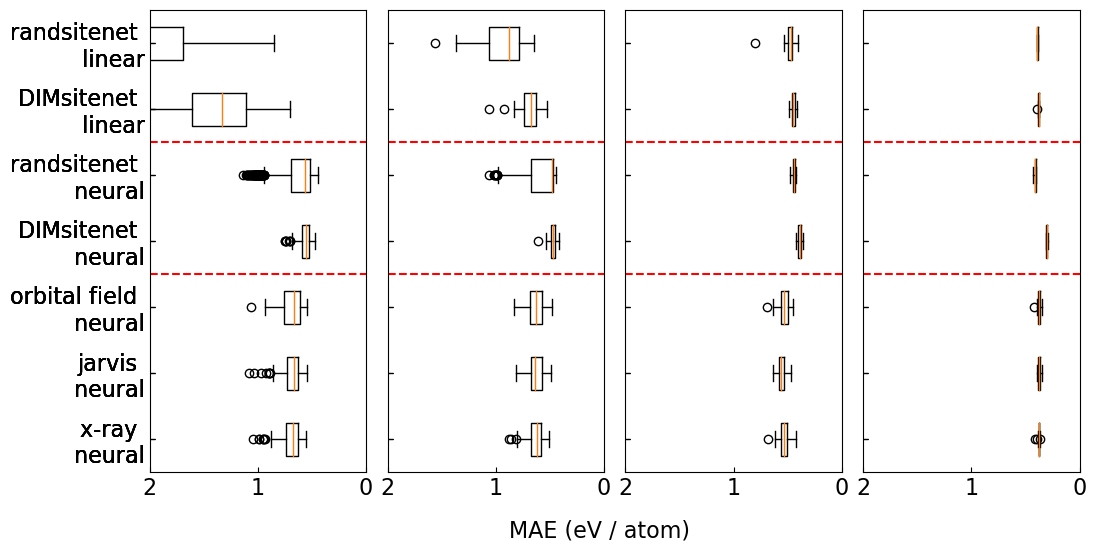

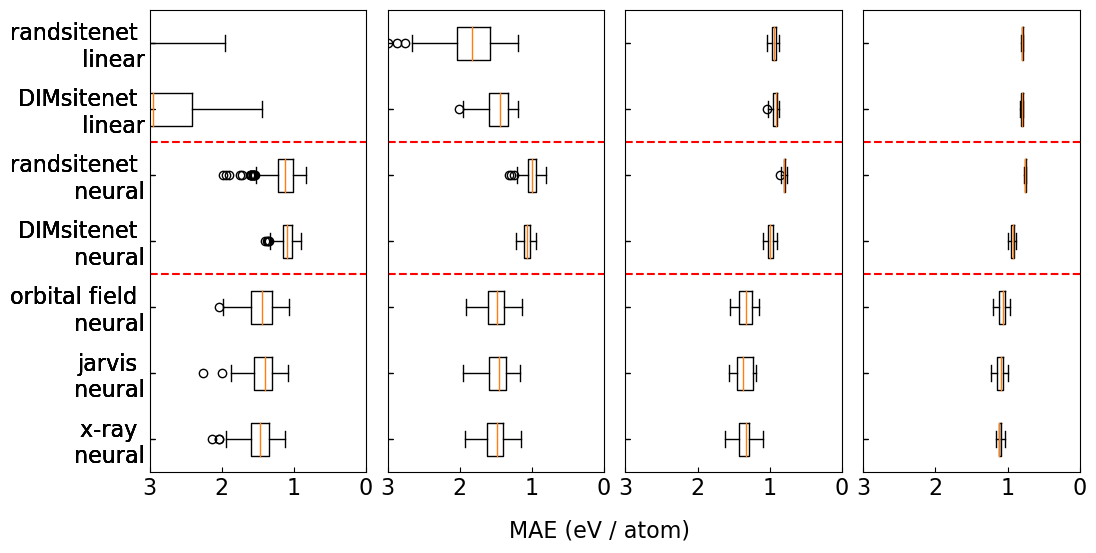

In [1]:
import pandas as pd
import matplotlib.pyplot as plt      
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

font = {'size'   : 16}

matplotlib.rc('font', **font)

RepMAE = pd.read_csv("Downstream_DIM.csv")
eformorbitalMAE = pd.read_csv("featurizer_pickles/eformorbital_Downstream_Featurized.csv")
eformjarvisMAE = pd.read_csv("featurizer_pickles/eformjarvis_Downstream_Featurized.csv")
eformxrayMAE =  pd.read_csv("featurizer_pickles/eformxray_Downstream_Featurized.csv")
print(RepMAE["model"].unique())

fig,ax = plt.subplots(1, 4, sharex=False, sharey=True,gridspec_kw={'wspace':0.1, 'hspace':0},figsize=(12,6))
fig.text(0.5, 0, "MAE (eV / atom)", ha='center')

ax_i = 0
for limit,name in zip([50,100,250,1000],["eformorbital_replearn_10.png","eformorbital_replearn_50.png","eformorbital_replearn_100.png","eformorbital_replearn_250.png","eformorbital_replearn_1000.png","eformorbital_replearn_10000.png"]):

    vectors1 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "Initial_eform")]
    vectors2 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "nocomp_klnorm_moremultiloss_eform")]
    vectors3 = eformorbitalMAE[(eformorbitalMAE["limit"] == limit) & (eformorbitalMAE["model"] == "eform_OrbitalFieldMatrix")]
    vectors4 = eformjarvisMAE[(eformjarvisMAE["limit"] == limit) & (eformjarvisMAE["model"] == "eform_jarvis")]
    vectors5 = eformxrayMAE[(eformxrayMAE["limit"] == limit) & (eformxrayMAE["model"] == "eform_xray")]

    ax[ax_i].boxplot([vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors4["nn_MAE"],vectors5["nn_MAE"]],labels=["randsitenet \n linear","DIMsitenet \n linear","randsitenet \n neural","DIMsitenet \n neural","orbital field \n neural","jarvis \n neural","x-ray \n neural"],widths=0.5,vert=False)
    [ax[ax_i].axhline(y, color = 'r', linestyle='--') for y in [2.5,4.5]]
    ax[ax_i].set_ylim(7.5,0.5)
    ax[ax_i].set_xlim(2,0)

    ax_i += 1

    fig.savefig("figure_eform_representation.png")
    fig.show()

RepMAE = pd.read_csv("Downstream_DIM.csv")
egaporbitalMAE = pd.read_csv("featurizer_pickles/egaporbital_Downstream_Featurized.csv")
egapjarvisMAE = pd.read_csv("featurizer_pickles/egapjarvis_Downstream_Featurized.csv")
egapxrayMAE =  pd.read_csv("featurizer_pickles/egapxray_Downstream_Featurized.csv")
print(RepMAE["model"].unique())

fig,ax = plt.subplots(1, 4, sharex=False, sharey=True,gridspec_kw={'wspace':0.1, 'hspace':0},figsize=(12,6))
fig.text(0.5, 0, "MAE (eV / atom)", ha='center')

ax_i = 0
for limit,name in zip([50,100,250,1000],["egaporbital_replearn_10.png","egaporbital_replearn_50.png","egaporbital_replearn_100.png","egaporbital_replearn_250.png","egaporbital_replearn_1000.png","egaporbital_replearn_10000.png"]):

    vectors1 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "Initial_egap")]
    vectors2 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "nocomp_klnorm_moremultiloss_egap")]
    vectors3 = egaporbitalMAE[(eformorbitalMAE["limit"] == limit) & (egaporbitalMAE["model"] == "egap_orbital")]
    vectors4 = egapjarvisMAE[(eformjarvisMAE["limit"] == limit) & (egapjarvisMAE["model"] == "egap_jarvis")]
    vectors5 = egapxrayMAE[(eformxrayMAE["limit"] == limit) & (egapxrayMAE["model"] == "egap_xray")]

    ax[ax_i].boxplot([vectors1["lin_MAE"],vectors2["lin_MAE"],vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors4["nn_MAE"],vectors5["nn_MAE"]],labels=["randsitenet \n linear","DIMsitenet \n linear","randsitenet \n neural","DIMsitenet \n neural","orbital field \n neural","jarvis \n neural","x-ray \n neural"],widths=0.5,vert=False)
    [ax[ax_i].axhline(y, color = 'r', linestyle='--') for y in [2.5,4.5]]
    ax[ax_i].set_ylim(7.5,0.5)
    ax[ax_i].set_xlim(3,0)

    ax_i += 1

    fig.savefig("figure_egap_representation.png")
    fig.show()

